In [2]:
import cv2

In [ ]:
img = cv2.imread('./img1.jpg')
cv2.imshow('out',img)
cv2.waitKey(0)

In [1]:
import numpy as np
import cv2

cap = cv2.VideoCapture('./video1.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.4.0) /tmp/pip-req-build-99ib2vsi/opencv/modules/highgui/src/window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


# feature detection

In [1]:
import numpy as np
import cv2

In [2]:

img1 = cv2.imread('./queen.png')
img2 = cv2.imread('./queenCap.jpg')
#cv2.imshow('out1',img1)
imgS = cv2.resize(img2, (540, 540)) 
#cv2.imshow('out2',imgS)
#cv2.waitKey(0)

In [3]:
orb = cv2.ORB_create(nfeatures=15000)

In [4]:
img1 = cv2.imread('./queen.png')
img2 = cv2.imread('./queenCap.jpg')
imgS = cv2.resize(img2, (540, 540)) 
kp1,des1 = orb.detectAndCompute(img1,None)
kp2,des2 = orb.detectAndCompute(imgS,None)

#imgKp1 = cv2.drawKeypoints(img1,kp1,None)
#imgKp2 = cv2.drawKeypoints(imgS,kp2,None)

#cv2.imshow('kp1',imgKp1)
#cv2.imshow('kp2',imgKp2)
#cv2.waitKey(0)

In [5]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

In [6]:
good = []

In [7]:
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])


In [8]:
img3 = cv2.drawMatchesKnn(img1,kp1,imgS,kp2,good,None,flags=2)

In [ ]:
cv2.imshow('im3',img3)
cv2.waitKey(0)

Populating the interactive namespace from numpy and matplotlib


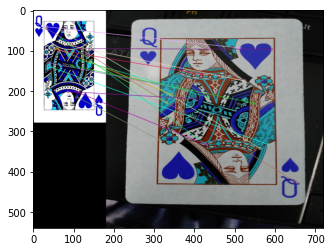

In [10]:
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(img3)
plt.show()